In [64]:
import yfinance as yf
import seaborn as sns
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from keras.layers import LSTM
from keras.layers import Dense ,Dropout
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score,mean_absolute_error,accuracy_score, mean_squared_error
from pandas.tseries.offsets import CustomBusinessDay
import matplotlib.pyplot as plt

In [2]:
ticker = yf.Ticker('TATAMOTORS.NS')

In [3]:
T_DF=ticker.history(period='5y')

In [4]:
T_DF.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-20,421.000000,425.700012,420.100006,423.000000,4051153,0,0
2017-11-21,424.450012,430.000000,422.500000,424.250000,6745407,0,0
2017-11-22,425.450012,433.000000,424.500000,428.600006,7899417,0,0
2017-11-23,428.600006,431.049988,422.450012,426.250000,7374216,0,0
2017-11-24,427.000000,429.950012,424.250000,425.500000,5108182,0,0


In [5]:
T_DF.drop(['Dividends','Stock Splits'],axis=1,inplace=True)

In [6]:
T_DF=T_DF.reset_index()

In [7]:
T_DF

,Date,Open,High,Low,Close,Volume
0,2017-11-20,421.000000,425.700012,420.100006,423.000000,4051153
1,2017-11-21,424.450012,430.000000,422.500000,424.250000,6745407
2,2017-11-22,425.450012,433.000000,424.500000,428.600006,7899417
3,2017-11-23,428.600006,431.049988,422.450012,426.250000,7374216
4,2017-11-24,427.000000,429.950012,424.250000,425.500000,5108182
...,...,...,...,...,...,...
1230,2022-11-14,424.000000,437.700012,423.500000,433.700012,17996083
1231,2022-11-15,434.899994,438.500000,434.100006,437.149994,10696024
1232,2022-11-16,436.950012,438.200012,429.600006,431.549988,8206169
1233,2022-11-17,422.000000,427.549988,419.600006,423.149994,15621809


In [8]:
T_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1235 non-null   datetime64[ns]
 1   Open    1235 non-null   float64       
 2   High    1235 non-null   float64       
 3   Low     1235 non-null   float64       
 4   Close   1235 non-null   float64       
 5   Volume  1235 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 58.0 KB


<AxesSubplot:xlabel='Date', ylabel='Close'>

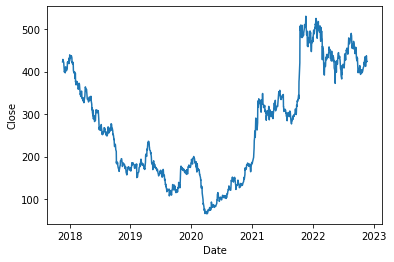

In [9]:
sns.lineplot(x=T_DF['Date'],y=T_DF['Close'])

In [10]:
T_DF=T_DF[T_DF['Date']>'2000-01-01']

In [11]:
T_dates = T_DF['Date']

In [12]:
T_dates.tail(15)

1220   2022-10-28
1221   2022-10-31
1222   2022-11-01
1223   2022-11-02
1224   2022-11-03
1225   2022-11-04
1226   2022-11-07
1227   2022-11-09
1228   2022-11-10
1229   2022-11-11
1230   2022-11-14
1231   2022-11-15
1232   2022-11-16
1233   2022-11-17
1234   2022-11-18
Name: Date, dtype: datetime64[ns]

In [13]:
Train_data=(T_DF[T_DF['Date']<'2022-11-07']).drop('Date',axis=1)

In [14]:
Train_data

,Open,High,Low,Close,Volume
0,421.000000,425.700012,420.100006,423.000000,4051153
1,424.450012,430.000000,422.500000,424.250000,6745407
2,425.450012,433.000000,424.500000,428.600006,7899417
3,428.600006,431.049988,422.450012,426.250000,7374216
4,427.000000,429.950012,424.250000,425.500000,5108182
...,...,...,...,...,...
1221,414.350006,416.299988,411.600006,412.750000,9928218
1222,414.899994,422.399994,412.799988,421.350006,17324893
1223,423.049988,425.100006,420.149994,422.149994,12433578
1224,419.399994,423.299988,414.500000,416.250000,10987519


In [15]:
scaler = StandardScaler()

In [16]:
scaler = scaler.fit(Train_data)

In [17]:
Train_data_scaled = scaler.transform(Train_data)

In [18]:
trainX=[]
trainY=[]
def Pre_multivareat():
    
    n_future=1
    n_past=14
    for i in range(n_past, len(Train_data_scaled) - n_future +1):
        trainX.append(Train_data_scaled[i - n_past:i, 0:Train_data.shape[1]])
        trainY.append(Train_data_scaled[i + n_future - 1:i + n_future, 0])

In [19]:
Pre_multivareat()

In [20]:
trainX,trainY= np.array(trainX),np.array(trainY)

In [21]:
trainX.shape

(1212, 14, 5)

In [22]:
trainY.shape

(1212, 1)

In [23]:
model = Sequential()

In [24]:
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1],trainX.shape[2]) ,return_sequences=True))
#model.add(LSTM(32, activation= 'relu', return_sequences= True))
model.add(LSTM(32, activation= 'relu', return_sequences= False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 64)            17920     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 30,369
Trainable params: 30,369
Non-trainable params: 0
_________________________________________________________________


In [79]:
Tuning = pd.DataFrame(columns=['epochs','batch_size','validation_split','verbose','1st last % Diff','2nd last % Diff','Avg Percent Diffrents'])

In [80]:
def model_tuning(epochs,batch_size,validation_split,verbose):
    global Tuning
    history = model.fit(trainX, trainY, epochs=epochs, batch_size= batch_size, validation_split= validation_split, verbose =verbose )
    n_feature = 10
    holidays = ['2022-01-26','2022-03-01','2022-03-18','2022-04-14','2022-04-15','2022-05-03','2022-08-09','2022-08-15','2022-08-31','2022-10-05','2022-10-26','2022-11-08']
    buz_day=CustomBusinessDay(holidays=holidays)
    forcast_dates = pd.date_range(list(T_dates)[-10], periods= n_feature, freq=buz_day).tolist()
    n_days_for_prediction=10
    prediction = model.predict(trainX[-n_days_for_prediction:])
    prediction_copies = np.repeat(prediction, Train_data.shape[1], axis=-1)
    y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]
    df_forcast = pd.DataFrame({'Date':np.array(forcast_dates),'Open':(y_pred_future)})
    df_forcast['Date']=pd.to_datetime(df_forcast['Date'])
    final_df = df_forcast
    final_df['Actual']=T_DF['Open'].tail(n_feature).values
    final_df['Diff'] = final_df['Actual']-final_df['Open']
    final_df['Diff_Percent']= ((final_df['Diff']/final_df['Actual'])*100)
    print(final_df)
    parametors={}
    Avg_diff = np.average(final_df['Diff_Percent'])
    first_per = final_df['Diff_Percent'][9]
    second_per = final_df['Diff_Percent'][8]
    parametors['epochs']=epochs
    parametors['batch_size']=batch_size
    parametors['validation_split']=validation_split
    parametors['verbose']=verbose
    parametors['1st last % Diff']= first_per
    parametors['2nd last % Diff']=second_per
    parametors['Avg Percent Diffrents']= Avg_diff
    Tuning=Tuning.append(parametors,ignore_index=True)
    
    #R2_s=('R2 Score - ',r2_score(final_df['Actual'],final_df['Open'])
    #print('Mean Absolute Error - ',mean_absolute_error(final_df['Actual'],final_df['Open']))
    #print('Mean Squared Error - ',mean_squared_error(final_df['Actual'],final_df['Open']))
    parametors.clear()

In [81]:
Tuning

,epochs,batch_size,validation_split,verbose,1st last % Diff,2nd last % Diff,Avg Percent Diffrents


In [82]:
start_i=10
stop_i=15

for i in range (start_i,stop_i):
    epochs=24
    batch_size=i
    validation_split=0.1
    verbose=1
    model_tuning(epochs,batch_size,validation_split,verbose)

Epoch 1/24
109/109 [==============================] - 2s 16ms/step - loss: 0.0224 - val_loss: 0.0034
Epoch 2/24
109/109 [==============================] - 2s 16ms/step - loss: 0.0216 - val_loss: 0.0024
Epoch 3/24
109/109 [==============================] - 2s 15ms/step - loss: 0.0239 - val_loss: 0.0037
Epoch 4/24
109/109 [==============================] - 2s 15ms/step - loss: 0.0208 - val_loss: 0.0023
Epoch 5/24
109/109 [==============================] - 2s 15ms/step - loss: 0.0214 - val_loss: 0.0022
Epoch 6/24
109/109 [==============================] - 2s 15ms/step - loss: 0.0203 - val_loss: 0.0099
Epoch 7/24
109/109 [==============================] - 2s 15ms/step - loss: 0.0182 - val_loss: 0.0031
Epoch 8/24
109/109 [==============================] - 2s 15ms/step - loss: 0.0211 - val_loss: 0.0019
Epoch 9/24
109/109 [==============================] - 2s 15ms/step - loss: 0.0187 - val_loss: 0.0106
Epoch 10/24
109/109 [==============================] - 2s 17ms/step - loss: 0.0200 - val_lo

C:\Users\praveen\AppData\Local\Temp/ipykernel_7580/934365679.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Tuning=Tuning.append(parametors,ignore_index=True)


100/100 [==============================] - 2s 17ms/step - loss: 0.0202 - val_loss: 0.0027
Epoch 2/24
100/100 [==============================] - 2s 16ms/step - loss: 0.0192 - val_loss: 0.0080
Epoch 3/24
100/100 [==============================] - 2s 16ms/step - loss: 0.0185 - val_loss: 0.0022
Epoch 4/24
100/100 [==============================] - 1s 15ms/step - loss: 0.0185 - val_loss: 0.0019
Epoch 5/24
100/100 [==============================] - 1s 15ms/step - loss: 0.0191 - val_loss: 0.0022
Epoch 6/24
100/100 [==============================] - 2s 15ms/step - loss: 0.0181 - val_loss: 0.0096
Epoch 7/24
100/100 [==============================] - 2s 16ms/step - loss: 0.0184 - val_loss: 0.0020
Epoch 8/24
100/100 [==============================] - 1s 15ms/step - loss: 0.0178 - val_loss: 0.0036
Epoch 9/24
100/100 [==============================] - 1s 14ms/step - loss: 0.0160 - val_loss: 0.0021
Epoch 10/24
100/100 [==============================] - 2s 15ms/step - loss: 0.0183 - val_loss: 0.0020


C:\Users\praveen\AppData\Local\Temp/ipykernel_7580/934365679.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Tuning=Tuning.append(parametors,ignore_index=True)


91/91 [==============================] - 2s 18ms/step - loss: 0.0207 - val_loss: 0.0168
Epoch 2/24
91/91 [==============================] - 1s 16ms/step - loss: 0.0181 - val_loss: 0.0088
Epoch 3/24
91/91 [==============================] - 1s 16ms/step - loss: 0.0161 - val_loss: 0.0087
Epoch 4/24
91/91 [==============================] - 1s 15ms/step - loss: 0.0195 - val_loss: 0.0020
Epoch 5/24
91/91 [==============================] - 1s 15ms/step - loss: 0.0172 - val_loss: 0.0029
Epoch 6/24
91/91 [==============================] - 1s 15ms/step - loss: 0.0182 - val_loss: 0.0018
Epoch 7/24
91/91 [==============================] - 1s 15ms/step - loss: 0.0185 - val_loss: 0.0031
Epoch 8/24
91/91 [==============================] - 1s 15ms/step - loss: 0.0184 - val_loss: 0.0088
Epoch 9/24
91/91 [==============================] - 1s 15ms/step - loss: 0.0177 - val_loss: 0.0018
Epoch 10/24
91/91 [==============================] - 1s 15ms/step - loss: 0.0176 - val_loss: 0.0038
Epoch 11/24
91/91 [=

C:\Users\praveen\AppData\Local\Temp/ipykernel_7580/934365679.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Tuning=Tuning.append(parametors,ignore_index=True)


84/84 [==============================] - 1s 16ms/step - loss: 0.0175 - val_loss: 0.0058
Epoch 2/24
84/84 [==============================] - 1s 15ms/step - loss: 0.0183 - val_loss: 0.0027
Epoch 3/24
84/84 [==============================] - 1s 17ms/step - loss: 0.0178 - val_loss: 0.0043
Epoch 4/24
84/84 [==============================] - 1s 15ms/step - loss: 0.0173 - val_loss: 0.0019
Epoch 5/24
84/84 [==============================] - 1s 15ms/step - loss: 0.0183 - val_loss: 0.0019
Epoch 6/24
84/84 [==============================] - 1s 15ms/step - loss: 0.0191 - val_loss: 0.0022
Epoch 7/24
84/84 [==============================] - 1s 15ms/step - loss: 0.0210 - val_loss: 0.0018
Epoch 8/24
84/84 [==============================] - 1s 15ms/step - loss: 0.0180 - val_loss: 0.0071
Epoch 9/24
84/84 [==============================] - 1s 15ms/step - loss: 0.0203 - val_loss: 0.0023
Epoch 10/24
84/84 [==============================] - 1s 15ms/step - loss: 0.0198 - val_loss: 0.0020
Epoch 11/24
84/84 [=

C:\Users\praveen\AppData\Local\Temp/ipykernel_7580/934365679.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Tuning=Tuning.append(parametors,ignore_index=True)


78/78 [==============================] - 1s 16ms/step - loss: 0.0156 - val_loss: 0.0052
Epoch 2/24
78/78 [==============================] - 1s 18ms/step - loss: 0.0212 - val_loss: 0.0039
Epoch 3/24
78/78 [==============================] - 1s 17ms/step - loss: 0.0202 - val_loss: 0.0071
Epoch 4/24
78/78 [==============================] - 1s 15ms/step - loss: 0.0202 - val_loss: 0.0028
Epoch 5/24
78/78 [==============================] - 1s 15ms/step - loss: 0.0180 - val_loss: 0.0041
Epoch 6/24
78/78 [==============================] - 1s 15ms/step - loss: 0.0204 - val_loss: 0.0018
Epoch 7/24
78/78 [==============================] - 1s 15ms/step - loss: 0.0185 - val_loss: 0.0061
Epoch 8/24
78/78 [==============================] - 1s 15ms/step - loss: 0.0166 - val_loss: 0.0029
Epoch 9/24
78/78 [==============================] - 1s 15ms/step - loss: 0.0161 - val_loss: 0.0033
Epoch 10/24
78/78 [==============================] - 1s 15ms/step - loss: 0.0192 - val_loss: 0.0023
Epoch 11/24
78/78 [=

C:\Users\praveen\AppData\Local\Temp/ipykernel_7580/934365679.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Tuning=Tuning.append(parametors,ignore_index=True)


In [83]:
Tuning

,epochs,batch_size,validation_split,verbose,1st last % Diff,2nd last % Diff,Avg Percent Diffrents
0,24.0,10.0,0.1,1.0,3.719798,2.316205,5.849238
1,24.0,11.0,0.1,1.0,2.955872,1.519848,5.272183
2,24.0,12.0,0.1,1.0,1.531817,-0.213732,4.028833
3,24.0,13.0,0.1,1.0,2.730884,1.249579,5.004451
4,24.0,14.0,0.1,1.0,3.037327,1.227118,5.133721


In [67]:
Tuning=(Tuning[Tuning['epochs']==24])[Tuning['1st last % Diff']<2]

C:\Users\praveen\AppData\Local\Temp/ipykernel_7580/2134534351.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Tuning=(Tuning[Tuning['epochs']==24])[Tuning['1st last % Diff']<2]


In [72]:
Tuning=Tuning[Tuning['batch_size']<30]

In [77]:
Tuning.drop(['validation_split','verbose'],axis=1)

,epochs,batch_size,1st last % Diff,2nd last % Diff,Avg Percent Diffrents
40,24.0,10.0,1.798342,0.034828,3.989360
42,24.0,12.0,1.900151,0.623224,4.609476
43,24.0,13.0,1.281393,-0.055836,3.853087
48,24.0,18.0,1.094257,-0.430247,3.479198
49,24.0,19.0,1.847264,0.273140,4.204257
50,24.0,20.0,0.679592,-0.972773,2.937955
52,24.0,22.0,0.870262,-0.090851,3.601114
55,24.0,25.0,1.530449,0.084900,4.068914
57,24.0,27.0,1.721047,0.379315,4.503383


<AxesSubplot:>

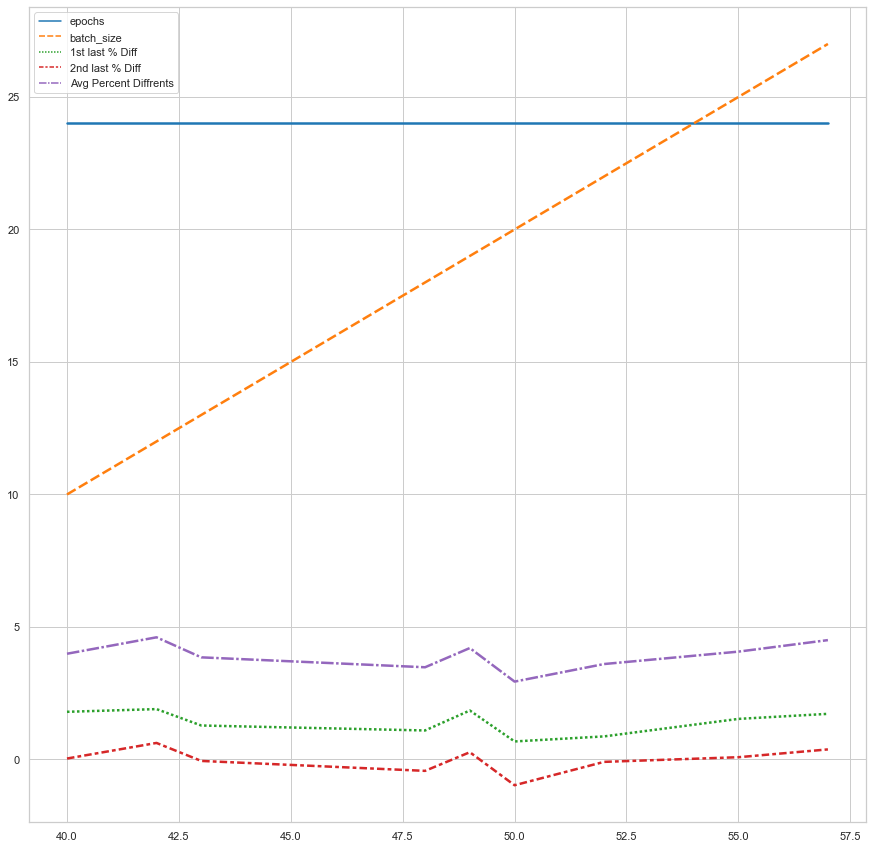

In [78]:
plt.figure(figsize=(15,15))
sns.set_theme(style="whitegrid")
data = Tuning
#data = data.rolling(7).mean()

sns.lineplot(data=(Tuning.drop(['validation_split','verbose'],axis=1)), palette="tab10", linewidth=2.5)